In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw()

┌───┐                                                 
q_0: ┤ H ├─■───────────────────────────────────────────────
     ├───┤ │                                               
q_1: ┤ H ├─┼──────■──────■─────────────────────────────────
     ├───┤ │      │      │                                 
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■─────
     ├───┤ │pi/4  │pi/4  │pi/4  │pi/4  │pi/4  │pi/4  │pi/4 
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■─────
     └───┘                                                 
c: 3/══════════════════════════════════════════════════════

In [5]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [6]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw()

┌───┐                                                  ░    ┌───┐        »
q_0: ┤ H ├─■────────────────────────────────────────────────░──X─┤ H ├─■──────»
     ├───┤ │                                                ░  │ └───┘ │-pi/2 »
q_1: ┤ H ├─┼──────■──────■──────────────────────────────────░──┼───────■──────»
     ├───┤ │      │      │                                  ░  │              »
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■──────░──X──────────────»
     ├───┤ │pi/4  │pi/4  │pi/4  │pi/4  │pi/4  │pi/4  │pi/4  ░                 »
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■──────░─────────────────»
     └───┘                                                  ░                 »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                ░ ┌─┐      
«q_0: ──────■────────────────────░─┤M├──────
«     ┌───┐ │                    ░ └╥┘┌─┐   
«q_1: ┤ H ├─┼───────■────────────░──╫─┤M├───
«     └───┘ │-pi/4  │-pi/2 ┌───┐ ░  ║ └╥┘┌─┐
«q_2: ──────■───────■──────┤ H ├─░──╫──╫─┤M├
«                          └───┘ ░  ║  ║ └╥┘
«q_3: ───────────────────────────░──╫──╫──╫─
«                                ░  ║  ║  ║ 
«c: 3/══════════════════════════════╩══╩══╩═
«                                   0  1  2

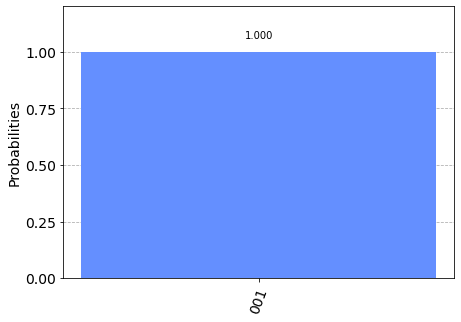

In [7]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [8]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                           ┌───┐»
q_0: ┤ H ├─■───────────────────────────────────────────────────────X─┤ H ├»
     ├───┤ │                                                       │ └───┘»
q_1: ┤ H ├─┼───────■───────■───────────────────────────────────────┼──────»
     ├───┤ │       │       │                                       │      »
q_2: ┤ H ├─┼───────┼───────┼───────■───────■───────■───────■───────X──────»
     ├───┤ │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3         »
q_3: ┤ X ├─■───────■───────■───────■───────■───────■───────■──────────────»
     └───┘                                                                »
c: 3/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                                  ┌─┐           
«q_0: ─■────────────■──────────────┤M├───────────
«      │-pi/2 ┌───┐ │              └╥┘     ┌─┐   
«q_1: ─■──────┤ H ├─┼───────■───────╫──────┤M├───
«             └───┘ │-pi/4  │-pi/2  ║ ┌───┐└╥┘┌─┐
«q_2: ──────────────■───────■───────╫─┤ H ├─╫─┤M├
«                                   ║ └───┘ ║ └╥┘
«q_3: ──────────────────────────────╫───────╫──╫─
«                                   ║       ║  ║ 
«c: 3/══════════════════════════════╩═══════╩══╩═
«                                   0       1  2

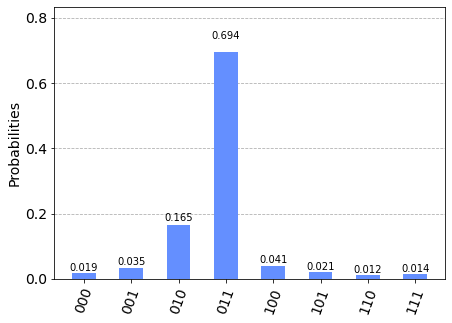

In [9]:
# Let's see the results!
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [10]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

┌───┐                                                                »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────»
     ├───┤ │                                                              »
q_1: ┤ H ├─┼───────■───────■──────────────────────────────────────────────»
     ├───┤ │       │       │                                              »
q_2: ┤ H ├─┼───────┼───────┼───────■───────■───────■───────■──────────────»
     ├───┤ │       │       │       │       │       │       │              »
q_3: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────┼───────■──────»
     ├───┤ │       │       │       │       │       │       │       │      »
q_4: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼──────»
     ├───┤ │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3 »
q_5: ┤ X ├─■───────■───────■───────■───────■───────■───────■───────■──────»
     └───┘                                                                »
c: 5/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ───────────────────────────────────────────────────────────X────────────»
«                                                                │            »
«q_2: ───────────────────────────────────────────────────────────┼────────────»
«                                                                │            »
«q_3: ─■───────■───────■───────■───────■───────■───────■─────────X────────────»
«      │       │       │       │       │       │       │                      »
«q_4: ─┼───────┼───────┼───────┼───────┼───────┼───────┼───────■───────■──────»
«      │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3 »
«q_5: ─■───────■───────■───────■───────■───────■───────■───────■───────■──────»
«                                                                             »
«c: 5/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_4: ─■───────■───────■───────■───────■───────■───────■───────■───────■──────»
«      │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3 »
«q_5: ─■───────■───────■───────■───────■───────■───────■───────■───────■──────»
«                                                                             »
«c: 5/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                ┌───┐                     »
«q_0: ─────────────────────────────────────────X─┤ H ├─■────────────■──────»
«                                              │ └───┘ │-pi/2 ┌───┐ │      »
«q_1: ─────────────────────────────────────────┼───────■──────┤ H ├─┼──────»
«                                              │              └───┘ │-pi/4 »
«q_2: ─────────────────────────────────────────┼────────────────────■──────»
«  

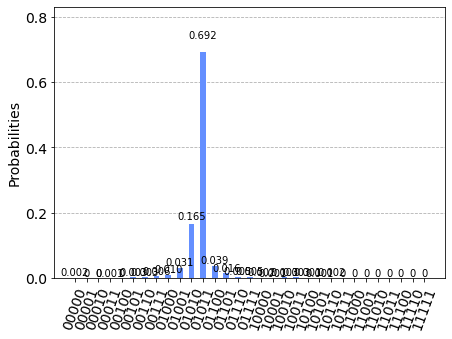

In [11]:
### Let's see the results!

backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [12]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to n qubits
#IBMQ.load_account()
IBMQ.enable_account('fe0bd2e17070e2b5b94944d689a01f08425035e19861f8266140594b49c5bbc266fe8c63d911cf0b5353d3a9f898091ceaadc1a84f0f8369c2f867a57f398b0a')
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_vigo')

# Run with 2048 shots
shots = 2048
job = execute(qpe, backend=backend, shots=2048, optimization_level=3)
job_monitor(job)

c:\users\karthiganesh_durai\envqc\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Job Status: job has successfully run


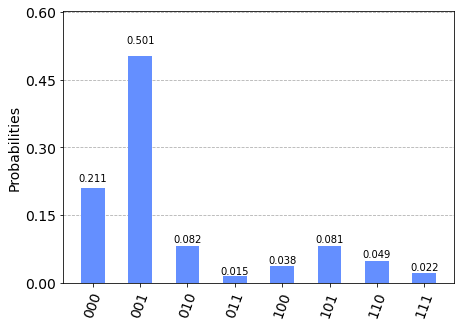

In [13]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)